# Generating Special Quasirandom Structure (SQS)

In [1]:
import matplotlib.pyplot as plt
import crystal_toolkit
from pymatgen.core import Lattice, Structure
from smol.capp.generate.special.sqs import StochasticSQSGenerator

### 1) Create a disordered prim structure

To generate SQS, we first have to creat a disordered structure to represent the configurational space as when creating `ClusterSubspace`.

In [2]:
# create a disordered V-Co-Ni FCC structure
structure = Structure.from_spacegroup(
    "Fm-3m",
    lattice=Lattice.cubic(3.58),
    species=[{"V": 1.0/3.0, "Co": 1.0/3.0, "Ni": 1.0/3.0}],
    coords=[[0, 0, 0]]
)

In [3]:
# visualize the structure (requires crystal_toolkit)
structure

If you see this text, the Crystal Toolkit Jupyter Lab 

extension is not installed. You can install it by running 

"pip install crystaltoolkit-extension" 

from the same environment you run "jupyter lab". 

This only works in Jupyter Lab 3.x or above.


Structure Summary
Lattice
    abc : 3.58 3.58 3.58
 angles : 90.0 90.0 90.0
 volume : 45.882712
      A : 3.58 0.0 0.0
      B : 0.0 3.58 0.0
      C : 0.0 0.0 3.58
    pbc : True True True
PeriodicSite: V:0.333, Co:0.333, Ni:0.333 (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: V:0.333, Co:0.333, Ni:0.333 (1.7900, 1.7900, 0.0000) [0.5000, 0.5000, 0.0000]
PeriodicSite: V:0.333, Co:0.333, Ni:0.333 (1.7900, 0.0000, 1.7900) [0.5000, 0.0000, 0.5000]
PeriodicSite: V:0.333, Co:0.333, Ni:0.333 (0.0000, 1.7900, 1.7900) [0.0000, 0.5000, 0.5000]

In [4]:
prim = structure.get_primitive_structure()
prim

If you see this text, the Crystal Toolkit Jupyter Lab 

extension is not installed. You can install it by running 

"pip install crystaltoolkit-extension" 

from the same environment you run "jupyter lab". 

This only works in Jupyter Lab 3.x or above.


Structure Summary
Lattice
    abc : 2.53144227664784 2.53144227664784 2.53144227664784
 angles : 59.99999999999999 59.99999999999999 59.99999999999999
 volume : 11.470678
      A : -1.79 -1.79 0.0
      B : -1.79 0.0 -1.79
      C : 0.0 -1.79 -1.79
    pbc : True True True
PeriodicSite: V:0.333, Co:0.333, Ni:0.333 (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]

### 2) Create a SQS generator object

In **smol** we have implemented the stochastic SQS generation proposed [here](https://doi.org/10.1016/j.calphad.2013.06.006).
In order to generate SQSs stochastically, we instantiate a `StochasticSQSGenerator` using the disordered prim representing our configurational search space, and the size of supercells to search.

A few notes on SQS generation in **smol**:

-  The default generator object will search for SQS structures at the composition given in the disordered structure, so users must make sure the chosen supercell size is compatible.
-  The default generator uses a biased orthornormal basis set, such that random structures at the given composition have a zero-valued correlation functions. These defaults can be over-ridded by passing arguments specifying the basis/orthonormalization/use_concentration as done when creating a cluster subspace.
-  Based on the basis defaults above, the default target vector is all zeros, but other target vectors can passed explicitly (for example for searching for "special quasi-ordered structures" or structures with specific short-range ordering).
-  SQS generation can be carried out by matching correlation vectors, or cluster interaction vectors (with all ECI implicitly set to one, though this can also be overriden)

In [5]:
# create a correlation vector based SQS generator
generator_corr = StochasticSQSGenerator.from_structure(
    structure=prim,
    cutoffs={2: 7, 3: 5},  # cluster cutoffs as passed to cluster subspaces
    supercell_size=36,   # the search will be over supercells of 36 atoms
    feature_type="correlation",
    match_weight=1.0,  # weight given to the maximum diameter of perfectly matched vectors (see original publication for details)
)

# create a cluster interaction vector based SQS generator
generator_cint = StochasticSQSGenerator.from_structure(
    structure=prim,
    cutoffs={2: 7, 3: 5},
    supercell_size=36,
    feature_type="cluster-interaction",
    match_weight=1.0,
)

### 3) Generate SQS by running simulated annealing

The `StochasticSQSGenerator` will search for SQSs over different supercells of the size given by running simulated annealing. The main arguments controlling the "search time" are the number of mcmc steps per temperature, and number of decreasing temperature values.

An important parameter is the `max_save_num` which sets the maximum number of candidate structures to keep in memory (the actual value may be less since a structure is only added if its "score" is better than previous ones). The default is set to 1% of the number of mcmc steps per temperature.

Finally, the default is to search over all symmetrically distinct supercells of a given size, however when only specific supercells are needed (ie to avoid skewed supercells), these can be passed directly using the `supercell_matrices` keyword argument (however, all supercell matrices must represent cells of the same size, ie have the same determinant).

In [6]:
# generate SQS using correlation vector based score
generator_corr.generate(
    mcmc_steps=100000,  # steps per temperature
    temperatures=None,  # use default, but any sequence of decreasing temperatures can be passed for further control of SA
    max_save_num= None, # the default in this case will be 1000 (1% of mcmc_steps), the actual value of SQSs will likely be much less than that
    progress=True       # show progress bar for each temperature
)

Generating SQS using 1 chain(s) from cells with 36 sites: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:49<00:00, 2011.70it/s]
Generating SQS using 1 chain(s) from cells with 36 sites: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:49<00:00, 2028.10it/s]
Generating SQS using 1 chain(s) from cells with 36 sites: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:49<00:00, 2023.77it/s]
Generating SQS using 1 chain(s) from cells with 36 sites: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

In [7]:
# generate SQS using cluster interaction vector based score
generator_cint.generate(
    mcmc_steps=100000, # steps per temperature
    temperatures=None,  # use default, but any sequence of decreasing temperatures can be passed for further control of SA
    max_save_num= None, # the default in this case will be 1000 (1% of mcmc_steps), the actual value of SQSs will likely be much less than that
    progress=True       # show progress bar for each temperature
)

Generating SQS using 1 chain(s) from cells with 36 sites: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:42<00:00, 2358.99it/s]
Generating SQS using 1 chain(s) from cells with 36 sites: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:40<00:00, 2497.45it/s]
Generating SQS using 1 chain(s) from cells with 36 sites: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:38<00:00, 2626.01it/s]
Generating SQS using 1 chain(s) from cells with 36 sites: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

### 4) Get the best SQSs candidates

Once an SA run has completed, we can inspect the best SQSs generated and pick the best one for the given application. Each SQS is saved as an named tuple with attributes for the structure, score, features, and supercell matrix. 

In [8]:
print(f"Total number of correlation score SQSs: {generator_corr.num_structures}")
print(f"Total number of cluster interaction score SQSs: {generator_cint.num_structures}")

Total number of correlation score SQSs: 20
Total number of cluster interaction score SQSs: 19


In [9]:
# get SQS structures (removing symmetrically equivalent duplicates)
sqs_corr_list = generator_corr.get_best_sqs(
    num_structures=generator_corr.num_structures,
    remove_duplicates=True,
)

sqs_cint_list = generator_cint.get_best_sqs(
    num_structures=generator_cint.num_structures,
    remove_duplicates=True,
)

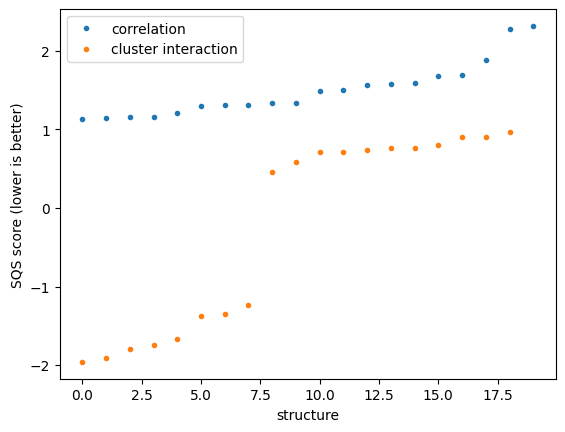

In [10]:
# Plot the SQS scores
# note the correlation vs cluster interaction based scores are not necessarily comparable

plt.plot([sqs.score for sqs in sqs_corr_list], '.')
plt.plot([sqs.score for sqs in sqs_cint_list], '.')
plt.ylabel("SQS score (lower is better)")
plt.xlabel("structure")
plt.legend(["correlation", "cluster interaction"])

#### 4.1) Compare the best SQS from both generation methods

In [11]:
# the lists are sorted as we can see in the plot above
sqs_corr = sqs_corr_list[0]
sqs_cint = sqs_cint_list[0]

print("Best SQS with correlation score search")
print(f"Correlation based score: {generator_corr.compute_score(sqs_corr.structure, sqs_corr.supercell_matrix)}")
print(f"Cluster interaction based score: {generator_cint.compute_score(sqs_corr.structure, sqs_corr.supercell_matrix)}\n")

print("Best SQS with cluster interaction score search")
print(f"Correlation based score: {generator_corr.compute_score(sqs_cint.structure, sqs_cint.supercell_matrix)}")
print(f"Cluster interaction based score: {generator_cint.compute_score(sqs_cint.structure, sqs_cint.supercell_matrix)}\n")

Best SQS with correlation score search
Correlation based score: 1.1338517782330162
Cluster interaction based score: 1.1784693699895203

Best SQS with cluster interaction score search
Correlation based score: 1.7005578060307238
Cluster interaction based score: -1.9599655898689594



In [12]:
print(f"Both correlation and cluster interaction score found same SQS: {sqs_corr == sqs_cint}")

Both correlation and cluster interaction score found same SQS: False


In [45]:
sqs_corr.structure

If you see this text, the Crystal Toolkit Jupyter Lab 

extension is not installed. You can install it by running 

"pip install crystaltoolkit-extension" 

from the same environment you run "jupyter lab". 

This only works in Jupyter Lab 3.x or above.


Structure Summary
Lattice
    abc : 4.384586639581888 8.769173279163777 11.034301065314466
 angles : 93.79728494475395 97.61137851709466 99.59406822686046
 volume : 412.9444079999999
      A : 1.79 3.58 1.79
      B : -7.16 3.5799999999999983 -3.5799999999999983
      C : -5.369999999999999 -3.5799999999999983 8.95
    pbc : True True True
PeriodicSite: V (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Ni (-10.7400, 1.7900, 5.3700) [0.4444, 0.9444, 0.8889]
PeriodicSite: Ni (-8.9500, 3.5800, 5.3700) [0.8889, 0.8889, 0.7778]
PeriodicSite: Ni (-8.9500, 1.7900, 3.5800) [0.3333, 0.8333, 0.6667]
PeriodicSite: Co (-7.1600, 3.5800, 3.5800) [0.7778, 0.7778, 0.5556]
PeriodicSite: V (-7.1600, 1.7900, 1.7900) [0.2222, 0.7222, 0.444

In [13]:
sqs_cint.structure

If you see this text, the Crystal Toolkit Jupyter Lab 

extension is not installed. You can install it by running 

"pip install crystaltoolkit-extension" 

from the same environment you run "jupyter lab". 

This only works in Jupyter Lab 3.x or above.


Structure Summary
Lattice
    abc : 5.062884553295679 8.395844210083936 9.804233779342475
 angles : 92.2307987678379 97.41755579098786 89.99999999999997
 volume : 412.9444079999999
      A : -3.58 0.0 -3.5799999999999983
      B : -5.37 -3.5799999999999983 5.369999999999997
      C : -1.79 8.950000000000003 3.5799999999999983
    pbc : True True True
PeriodicSite: Co (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Co (-7.1600, 3.5800, 7.1600) [0.1944, 0.9444, 0.7778]
PeriodicSite: V (-7.1600, 1.7900, 5.3700) [0.3889, 0.8889, 0.5556]
PeriodicSite: V (-7.1600, 0.0000, 3.5800) [0.5833, 0.8333, 0.3333]
PeriodicSite: V (-7.1600, -1.7900, 1.7900) [0.7778, 0.7778, 0.1111]
PeriodicSite: Co (-8.9500, 5.3700, 3.5800) [0.9722, 0.7

### Compare with ATAT mcsqs

The **mcsqs** program in the ATAT toolkit is arguably the *gold standard* and most popular program to generate SQS. Lets compare the resulting SQSs generated with **mcsqs** and **smol**.
This requires ATAT to be installed, see instructions [here](https://www.brown.edu/Departments/Engineering/Labs/avdw/atat/).

In [14]:
# Use pymatgen interface to mcsqs to generate SQSs with ATAT
from pymatgen.command_line.mcsqs_caller import run_mcsqs

Since the pmg `SQSTransformation` takes shell numbers as inputs to determine cluster sizes, in order to match the search with **smol** we first have to make sure the same cluster cutoffs are we will call the `run_mcsqs` interface function which takes the cluster cutoffs directly.

In [15]:
mc_sqs = run_mcsqs(
    structure=prim,
    clusters={2: 7, 3: 5},
    scaling=36,
    instances=1,
    search_time=15 # minutes approximately the time the smol search took
)

Generating clusters...
2 2.53144 6
2 2.53144 12
2 2.53144 6
2 3.58000 3
2 3.58000 6
2 3.58000 3
2 4.38459 12
2 4.38459 24
2 4.38459 12
2 5.06288 6
2 5.06288 12
2 5.06288 6
2 5.66048 12
2 5.66048 24
2 5.66048 12
2 6.20074 4
2 6.20074 8
2 6.20074 4
2 6.69757 24
2 6.69757 48
2 6.69757 24
3 2.53144 8
3 2.53144 24
3 2.53144 24
3 2.53144 8
3 3.58000 12
3 3.58000 24
3 3.58000 12
3 3.58000 24
3 3.58000 12
3 3.58000 12
3 4.38459 24
3 4.38459 48
3 4.38459 24
3 4.38459 48
3 4.38459 24
3 4.38459 24
3 4.38459 24
3 4.38459 24
3 4.38459 24
3 4.38459 24
3 4.38459 24
3 4.38459 24
3 4.38459 24
3 4.38459 24
3 4.38459 24
3 4.38459 48
3 4.38459 24
3 4.38459 24
3 4.38459 48
3 4.38459 24
3 4.38459 24
3 4.38459 48
3 4.38459 24
3 4.38459 24
3 4.38459 48
3 4.38459 24
3 4.38459 8
3 4.38459 24
3 4.38459 24
3 4.38459 8


In [21]:
mc_sqs.bestsqs

If you see this text, the Crystal Toolkit Jupyter Lab 

extension is not installed. You can install it by running 

"pip install crystaltoolkit-extension" 

from the same environment you run "jupyter lab". 

This only works in Jupyter Lab 3.x or above.


Structure Summary
Lattice
    abc : 6.697566722325355 7.59432682994352 9.127244929331084
 angles : 76.63668094456864 68.47546009988183 75.40550878208887
 volume : 412.94440800000007
      A : -3.58 -5.37 1.79
      B : -7.16 1.79 -1.79
      C : -1.79 -5.37 -7.16
    pbc : True True True
PeriodicSite: Ni (-7.1600, -7.1600, -7.1600) [0.5000, 0.5000, 1.0000]
PeriodicSite: V (-7.1600, -3.5800, -0.0000) [0.8056, 0.5833, 0.0556]
PeriodicSite: Ni (-5.3700, 0.0000, -1.7900) [0.1111, 0.6667, 0.1111]
PeriodicSite: Ni (-7.1600, -1.7900, -1.7900) [0.4167, 0.7500, 0.1667]
PeriodicSite: V (-8.9500, -3.5800, -1.7900) [0.7222, 0.8333, 0.2222]
PeriodicSite: V (-7.1600, 0.0000, -3.5800) [0.0278, 0.9167, 0.2778]
PeriodicSite: Co (-12.5300, -8.9500, -7.1

In [42]:
# print the sum of the absolute values of correlation vectors
print(f"mcsqs correlation vector sum: {sum(abs(generator_corr.cluster_subspace.corr_from_structure(mc_sqs.bestsqs)[1:]))}")
print(f"smol sqs_corr correlation vector sum: {sum(abs(generator_corr.cluster_subspace.corr_from_structure(sqs_corr.structure)[1:]))}")
print(f"smol sqs_cint correlation vector sum: {sum(abs(generator_corr.cluster_subspace.corr_from_structure(sqs_cint.structure)[1:]))}")

mcsqs correlation vector sum: 1.522646219560806
smol sqs_corr correlation vector sum: 1.1338517782330162
smol sqs_cint correlation vector sum: 1.7005578060307245
